In [1]:
import pandas as pd
import plotly.express as px

color_discrete_map = {'n': 'rgb(0,114,178)'}

Calculate the number of targets per compound and the number of compounds per target class.

In [2]:
batch = "2020_11_04_CPJUMP1"

target1_metadata = (
    pd.read_csv('input/JUMP-Target-1_compound_metadata_additional_annotations.tsv', sep='\t', usecols=['broad_sample', 'target_list'])
    .rename(columns={'broad_sample':'Metadata_broad_sample', 'target_list':'Metadata_target_list'})
    .assign(Metadata_target=lambda x: x.Metadata_target_list.str.split('|'))
    .explode("Metadata_target")
    .reset_index(drop=True)
)

crispr_metadata = pd.read_csv('../metadata/external_metadata/JUMP-Target-1_crispr_metadata.tsv', sep='\t')
genes = crispr_metadata = list(set(crispr_metadata.gene))

# Filter out rows that don't correspond to genes in the CRISPR experiment
target1_metadata = target1_metadata.query('Metadata_target==@genes').reset_index(drop=True)


### Number of targets per compound

In [3]:
n_targets = target1_metadata.groupby('Metadata_broad_sample').Metadata_target.apply(lambda x: len(x)).reset_index()
targets_df = (
    n_targets.Metadata_target.value_counts()
    .reset_index()
    .rename(columns={'index':'n', 'Metadata_target': 'n_target'})
    .assign(color='n')
)


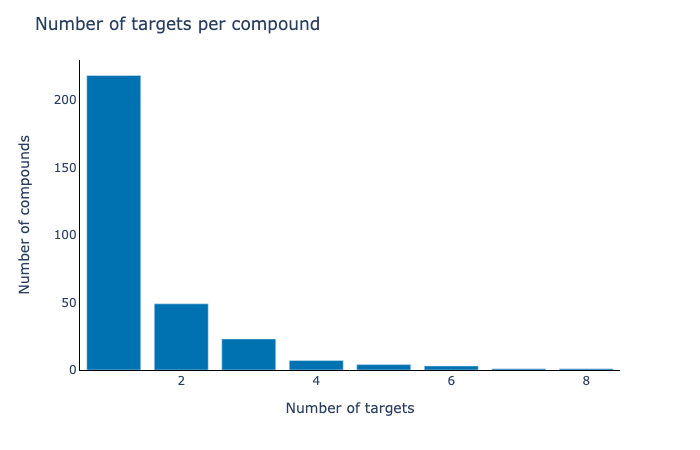

In [4]:
fig = px.bar(
    targets_df,
    x="n",
    y="n_target",
    color="color",
    color_discrete_map=color_discrete_map)
fig.update_layout(
    title="Number of targets per compound",
    xaxis=dict(title="Number of targets", linecolor = "#000000"),
    yaxis=dict(title="Number of compounds", linecolor = "#000000"),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False)
fig.show("png")
fig.write_image('figures/6.number_of_targets.png', width=640, height=480, scale=2)

### Number of compounds per target class

In [5]:
n_compounds = target1_metadata.groupby('Metadata_target').Metadata_broad_sample.apply(lambda x: len(x)).reset_index()
compounds_df = (
    n_compounds.Metadata_broad_sample.value_counts()
    .reset_index()
    .rename(columns={'index':'n', 'Metadata_broad_sample': 'n_compounds'})
    .assign(color='n')
)

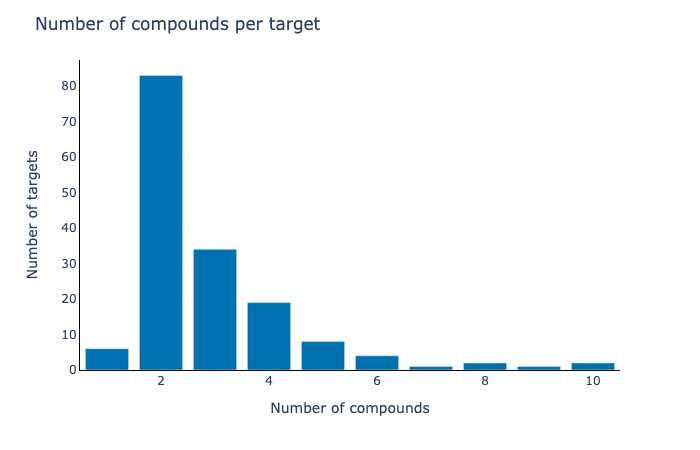

In [6]:
fig = px.bar(
    compounds_df,
    x="n",
    y="n_compounds",
    color="color",
    color_discrete_map=color_discrete_map)
fig.update_layout(
    title="Number of compounds per target",
    xaxis=dict(title="Number of compounds", linecolor = "#000000"),
    yaxis=dict(title="Number of targets", linecolor = "#000000"),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=False)
fig.show("png")
fig.write_image('figures/6.number_of_compounds.png', width=640, height=480, scale=2)